#### PGE 382 - Numerical Methods in Petroleum and Geosystems Engineering
#### Renato Poli - rep2656

#### CP2 - Feb, 7th

### Test setup

In [1]:
MAXX = 10
MAXT = 0.85

DX = 1 / 40
DT = 1 / 100

### a) Case 1

In [2]:
from math import factorial, pi, sin, ceil
import numpy as np
from numpy import exp, linspace, vectorize
import matplotlib.pyplot as plt

plt.style.use('paper.mplstyle')


X = np.arange(0, 10 + DX, DX)
T = np.arange(0, 0.85 + DT, DT)

nx = len(X)
nt = len(T)

# Set initial condition and BC@X=0
Uni = np.zeros( (nt, nx) )

Uni[0,:] = np.exp( - X )
Uni[:,0] = np.exp( T )

EXACT_Uni = np.zeros( (nt, nx) )
for n in np.arange( 0, nt ) :
    EXACT_Uni[n,:] = np.exp( T[n] - X )

for n in np.arange( 0, nt-1 ) :
    K = np.zeros( (nx, nx) )
    F = np.zeros( nx )
    for i in np.arange( 1, nx ) :
        K[i, i-1] += - 1/2/DX - 1/DX/DX
        K[i, i]   +=   2/DT + 2/DX/DX + 1

        F[i] += Uni[n,i-1] * ( 1/2/DX + 1/DX/DX )
        F[i] += Uni[n,i  ] * ( 2/DT - 2/DX/DX - 1  )

        # BOUNDARY CONDITIONS
        
        # BC @ i=0
        if i == 1 :
            F[i] -=  (- 1/2/DX - 1/DX/DX) * Uni[n+1,i-1]

        if i < nx-1 :
           K[i, i+1] += 1/2/DX - 1/DX/DX
           F[i]      += Uni[n,i+1] * ( -1/2/DX + 1/DX/DX )
        # BC @ i=N
        else :  
            K[i, i-1] += 1/2/DX - 1/DX/DX
            K[i, i]   += (-2*DX) * ( 1/2/DX - 1/DX/DX )
            F[i] += ( Uni[n,i-1] - 2*DX*Uni[n,i] ) * ( - 1/2/DX + 1/DX/DX )


    # Remove i=0
    K=K[1:nx,1:nx]
    F=F[1:nx]
    U = np.linalg.solve(K,F)
    Uni[n+1,1:nx] = U

print("# Done")

""


# Done


''

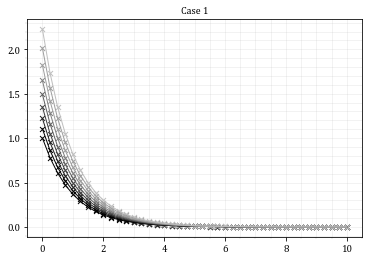

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

range = np.arange(nt-1)[::10]
# range = np.arange(2)
colors = cm.get_cmap('gray', len(range))
print(colors)
i=0
for n in range :
    evr = 10
    c=colors(n/nt*.8)
    plt.plot( X[::evr], EXACT_Uni[n,::evr], color=c )
    plt.scatter( X[::evr], Uni[n,::evr], color=c, s=25, marker='x' )
plt.title("Case 1")
plt.savefig("Case_1.svg")

#### Final Time

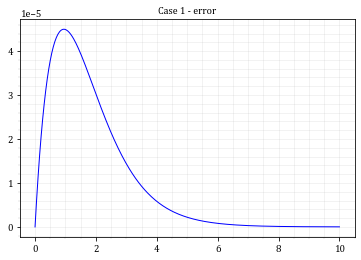

In [4]:
C1_LAST = Uni[-1,:]
C1_ERR = abs(EXACT_Uni[-1,:] - Uni[-1,:])
plt.plot(X,C1_ERR)
plt.title("Case 1 - error")
plt.savefig("Case_1-Err.svg")

\newpage
### b) Case 2

In [5]:
from math import factorial, pi, sin, ceil
import numpy as np
from numpy import exp, linspace, vectorize
import matplotlib.pyplot as plt

plt.style.use('paper.mplstyle')


X = np.arange(0, 10 + DX, DX)
T = np.arange(0, 0.85 + DT, DT)

nx = len(X)
nt = len(T)

# Set initial condition and BC@X=0
Uni = np.zeros( (nt, nx) )

Uni[0,:] = np.exp( - X )
Uni[:,0] = np.exp( T )

EXACT_Uni = np.zeros( (nt, nx) )
for n in np.arange( 0, nt ) :
    EXACT_Uni[n,:] = np.exp( T[n] - X )

for n in np.arange( 0, nt-1 ) :
    K = np.zeros( (nx, nx) )
    F = np.zeros( nx )
    for i in np.arange( 1, nx ) :
        K[i, i-1] += - 1/DX - 1/DX/DX
        K[i, i]   +=   1/DX + 2/DT + 2/DX/DX + 1

        F[i] += Uni[n,i-1] * ( 1/DX + 1/DX/DX )
        F[i] += Uni[n,i  ] * ( -1/DX + 2/DT - 2/DX/DX - 1  )

        # BOUNDARY CONDITIONS
        
        # BC @ i=0
        if i == 1 :
            F[i] +=  (1/DX/DX + 1/DX) * Uni[n+1,i-1]

        if i < nx-1 :
           K[i, i+1] += - 1/DX/DX
           F[i]      += Uni[n,i+1] * ( 1/DX/DX  )
        # BC @ i=N
        else :  
            K[i, i]   += (1-DX) * ( - 1/DX/DX )
            F[i] += Uni[n,i] * ( 1 - DX ) * ( - 1/DX + 1/DX/DX )


    # Remove i=0
    K=K[1:nx,1:nx]
    F=F[1:nx]
    U = np.linalg.solve(K,F)
    Uni[n+1,1:nx] = U

print("# Done")

# Done


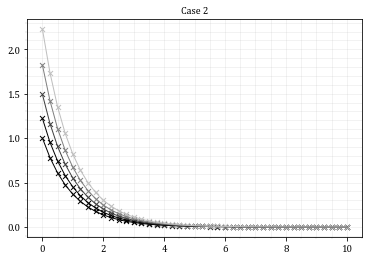

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

range = np.arange(nt-1)[::20]
colors = cm.get_cmap('gray', len(range))
print(colors)
i=0
for n in range :
    evr = 10
    c=colors(n/nt*.8)
    plt.plot( X[::evr], EXACT_Uni[n,::evr], color=c )
    plt.scatter( X[::evr], Uni[n,::evr], color=c, s=25, marker='x' )
plt.title("Case 2")
plt.savefig("case2.svg")

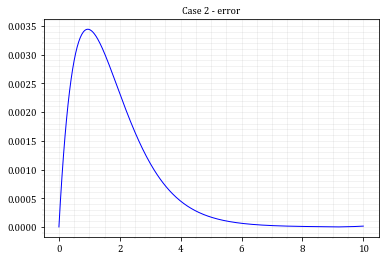

In [7]:
C2_LAST = Uni[-1,:]
C2_ERR = abs(EXACT_Uni[-1,:] - Uni[-1,:])
plt.plot(X,C2_ERR)
plt.title("Case 2 - error")
plt.savefig("Case_2-Err.svg")

#### Final time - Case 2

C1 Max err          C2 Max err          
4.49684e-05         3.44407e-03


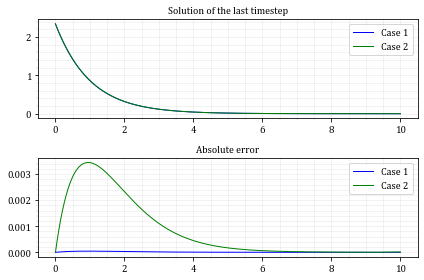

In [8]:
fig, [ax1,ax2] = plt.subplots(2,1)

ax1.set_title("Solution of the last timestep")
ax1.plot(X,C1_LAST, label='Case 1')
ax1.plot(X,C2_LAST, label='Case 2')
ax1.legend()

ax2.set_title("Absolute error")
ax2.plot(X,C1_ERR, label='Case 1')
ax2.plot(X,C2_ERR, label='Case 2')
ax2.legend()

fig.tight_layout()

C1_MAX = max(C1_ERR)
C2_MAX = max(C2_ERR)

print(f"{'C1 Max err':20s}{'C2 Max err':20s}")
print(50*"=")
print(f"{C1_MAX:10.5e}{C2_MAX:-20.5e}")
print(50*"=")

fig.savefig("err.svg")